In [2]:
import os
from torchvision import datasets, transforms

DATA_DIR = "og_dataset"

# remove problematic folder
bad_folder = os.path.join(DATA_DIR, "extracted_images")
if os.path.exists(bad_folder):
    print(f"⚠️ Removing {bad_folder} (not a valid class folder)")
    import shutil
    shutil.rmtree(bad_folder)

val_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=val_transforms)
print(f"✅ Found {len(full_dataset.classes)} classes: {full_dataset.classes}")


⚠️ Removing og_dataset\extracted_images (not a valid class folder)
✅ Found 89 classes: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']


Found 89 classes: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
Performing EDA on 1000 samples.
Generating Class Distribution Chart...


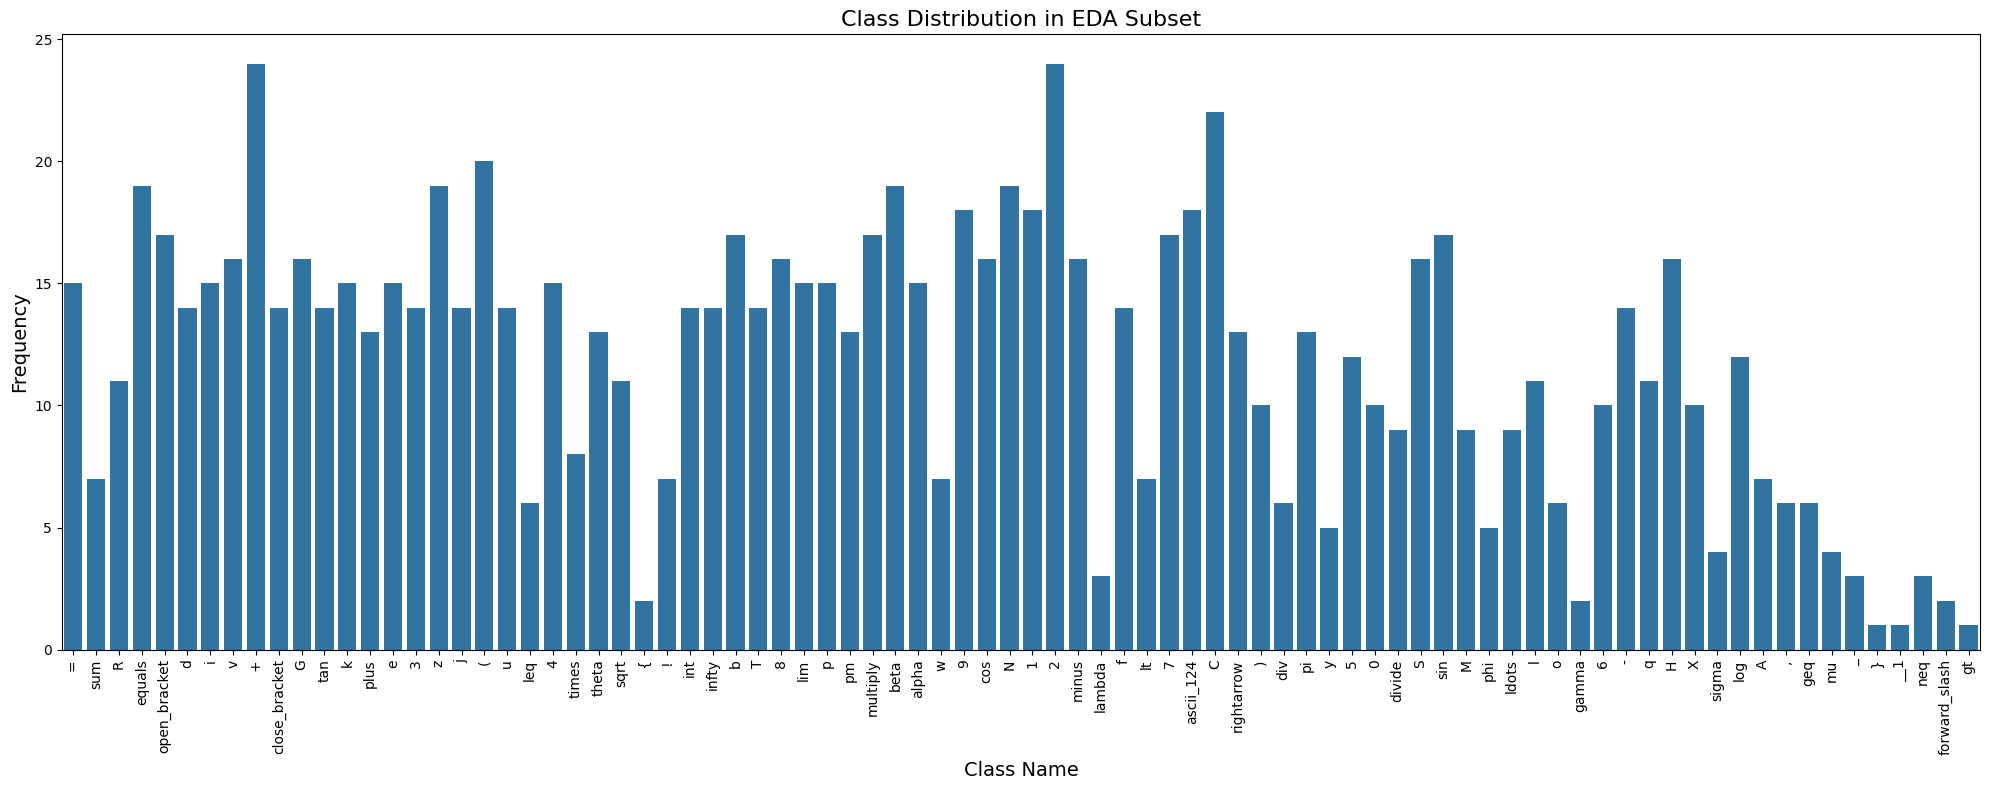

Generating Random Sample Grid...


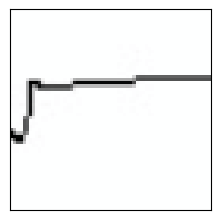

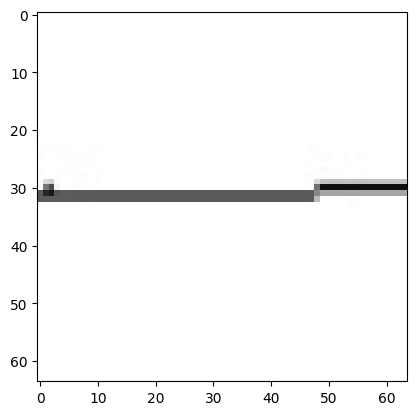

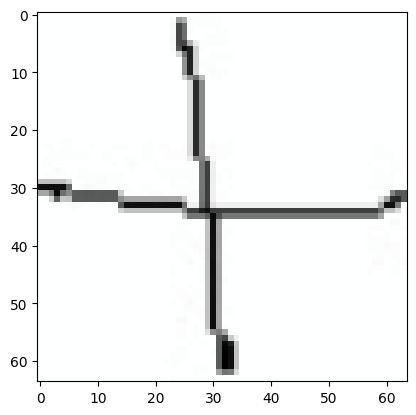

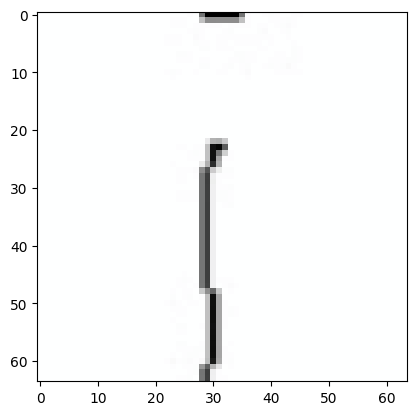

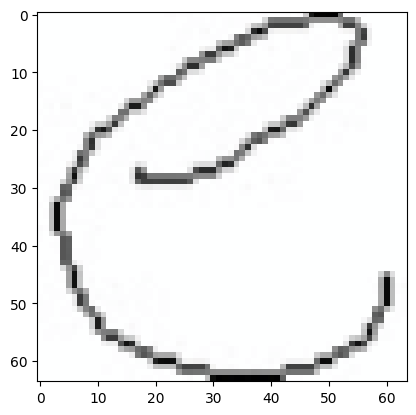

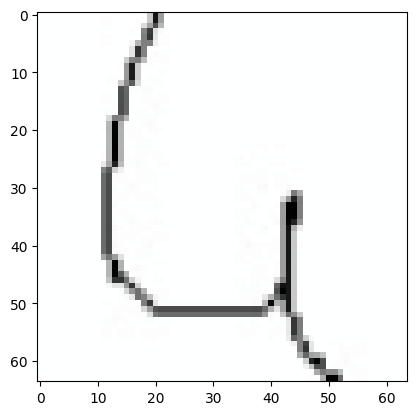

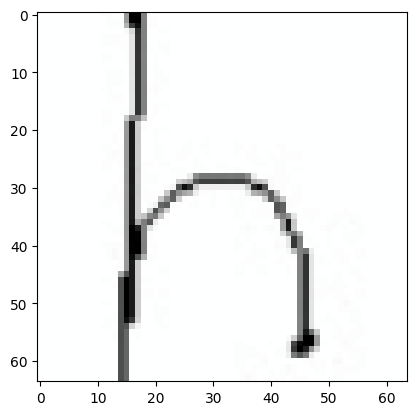

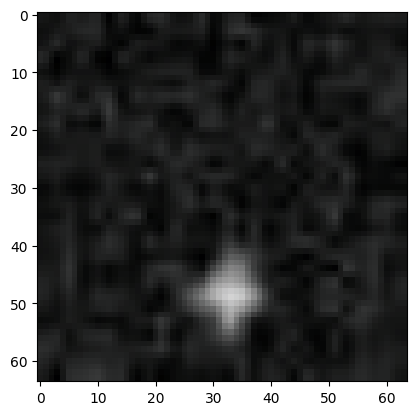

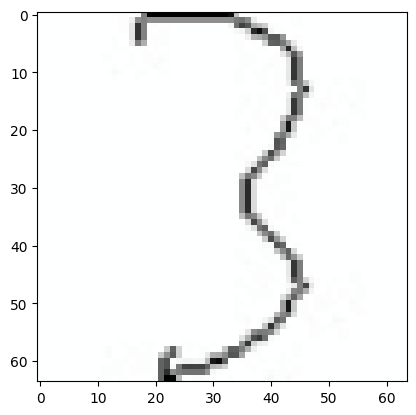

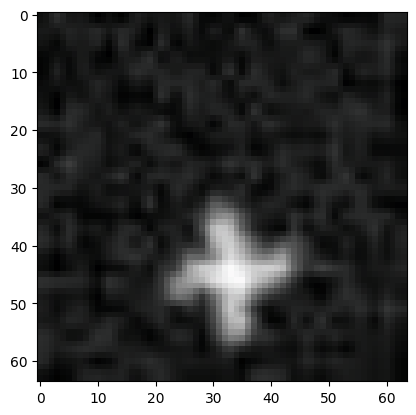

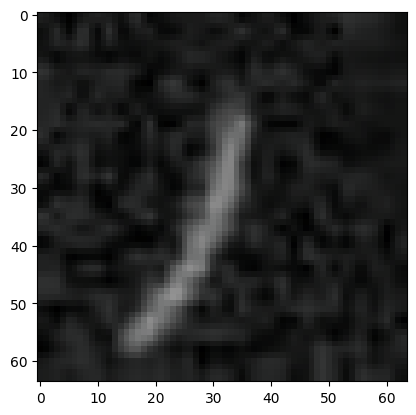

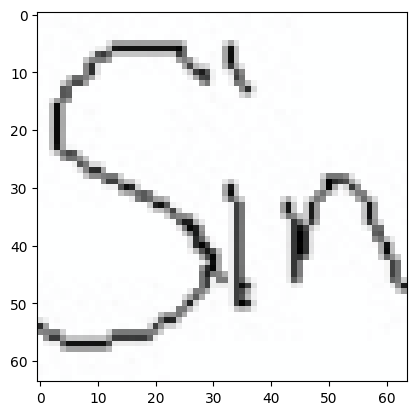

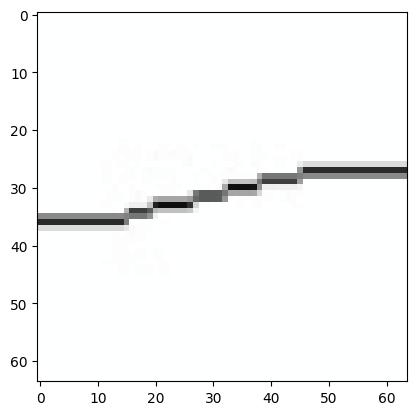

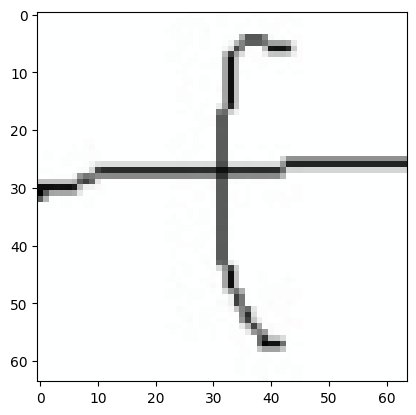

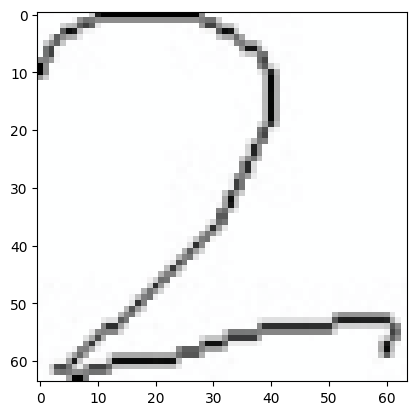

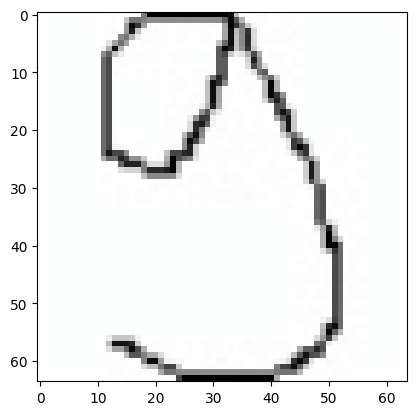

<Figure size 640x480 with 0 Axes>

Generating dimensionality reduction plot (t-SNE or PCA)...
Using t-SNE with perplexity=30


C:\Users\Acer\AppData\Local\Temp\ipykernel_39712\1674264798.py:104: UserWarning: The palette list has more values (89) than needed (84), which may not be intended.
  sns.scatterplot(


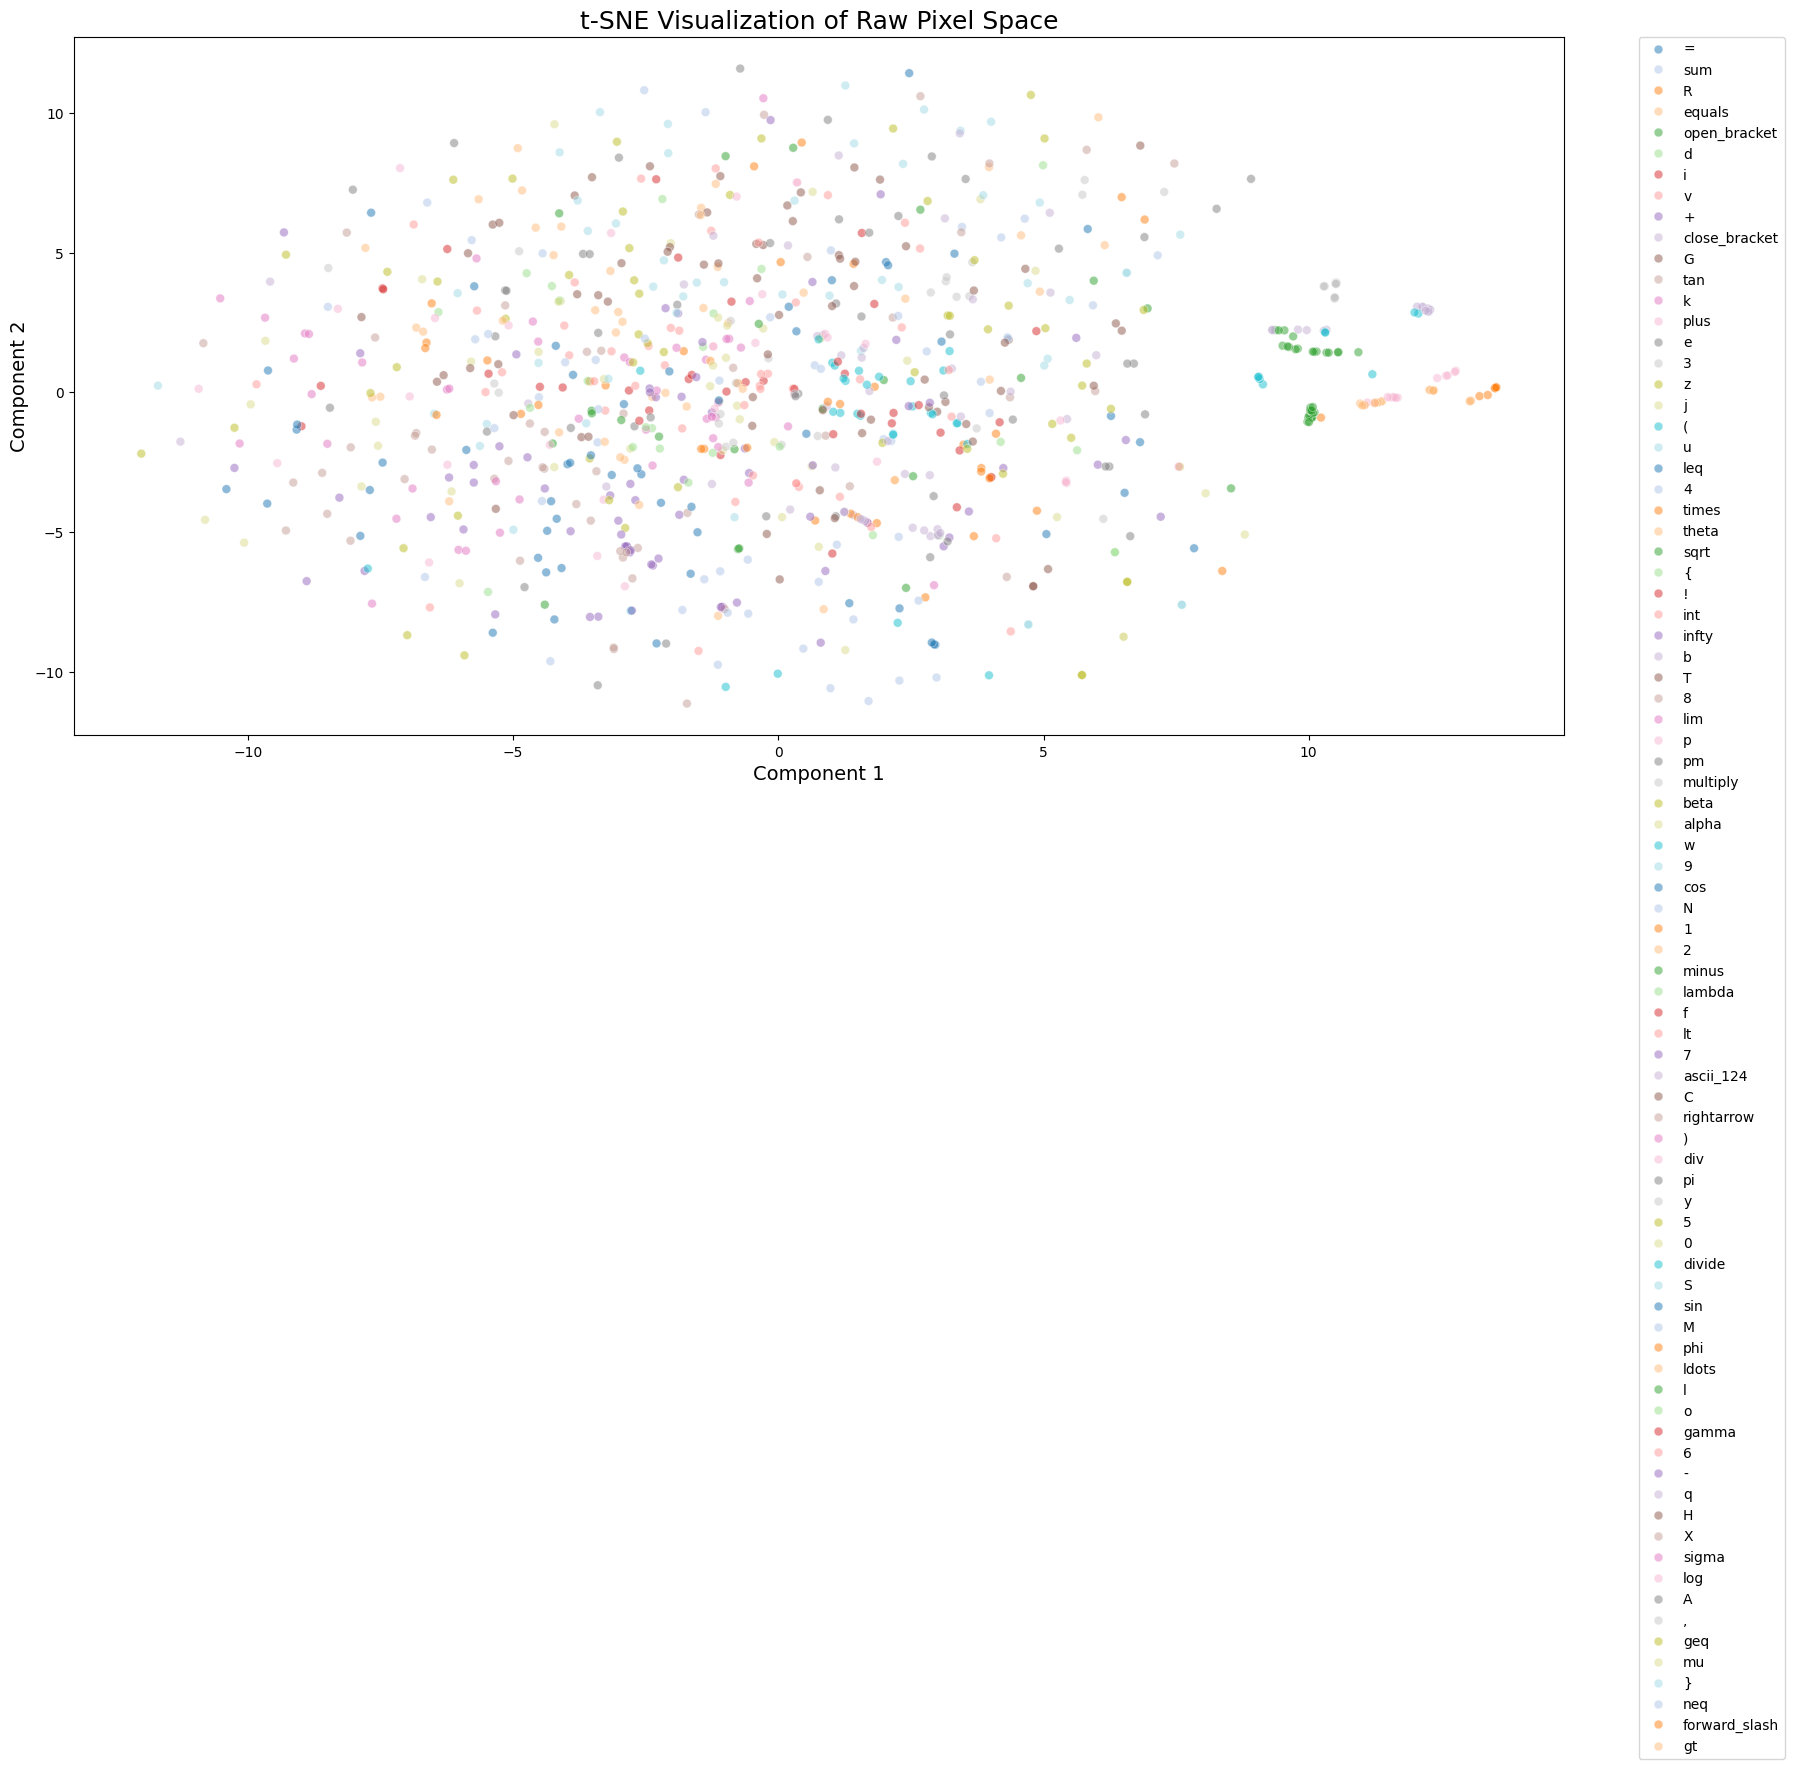

EDA script finished.


In [19]:
# 02_eda.py
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

# --- Configuration ---
DATA_DIR = 'og_dataset'   # dataset root folder
EDA_SAMPLES = 1000  # Use a subset of data for faster EDA

# --- Define transforms ---
val_transforms = transforms.Compose([
    transforms.Resize((64, 64)),  # you can change to (224, 224) for bigger models
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# --- Load dataset with ImageFolder ---
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=val_transforms)
class_names = full_dataset.classes
print(f"Found {len(class_names)} classes: {class_names}")

# Create a random subset for EDA
indices = torch.randperm(len(full_dataset))[:EDA_SAMPLES]
eda_dataset = Subset(full_dataset, indices)
eda_loader = DataLoader(eda_dataset, batch_size=32, shuffle=False)

print(f"Performing EDA on {len(eda_dataset)} samples.")

# 1. Class Distribution Bar Chart
print("Generating Class Distribution Chart...")
labels = [label for _, label in eda_dataset]
label_counts = Counter(labels)

plt.figure(figsize=(20, 8))  # larger figure
sns.barplot(x=[class_names[i] for i in label_counts.keys()],
            y=list(label_counts.values()))
plt.title('Class Distribution in EDA Subset', fontsize=16)
plt.xlabel('Class Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # rotate x labels
plt.tight_layout()
plt.savefig('eda_class_distribution.png', dpi=300)
plt.show()


# Helper to un-normalize images for display
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# 2. Random Sample Grid of Images
print("Generating Random Sample Grid...")
images, labels = next(iter(DataLoader(eda_dataset, batch_size=16, shuffle=True)))
fig = plt.figure(figsize=(12, 12))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    imshow(images[i])
    ax.set_title(f'Class: {class_names[labels[i].item()]}')
plt.savefig('eda_sample_grid.png', dpi=300)
plt.show()

# 3. t-SNE/PCA Visualization of Raw Pixel Space
print("Generating dimensionality reduction plot (t-SNE or PCA)...")
all_pixels = []
all_labels = []
for images, labels in eda_loader:
    # Flatten the images
    pixels = images.view(images.size(0), -1)
    all_pixels.append(pixels)
    all_labels.append(labels)

all_pixels = torch.cat(all_pixels).numpy()
all_labels = torch.cat(all_labels).numpy()

n_samples = len(all_pixels)

if n_samples > 50:  # enough samples for t-SNE
    perplexity = min(30, (n_samples - 1) // 3)
    print(f"Using t-SNE with perplexity={perplexity}")
    reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=300)
else:
    print("Too few samples for t-SNE, using PCA instead")
    reducer = PCA(n_components=2)

results = reducer.fit_transform(all_pixels)

plt.figure(figsize=(18, 14))  # bigger figure for spaciousness
sns.scatterplot(
    x=results[:, 0], y=results[:, 1],
    hue=[class_names[i] for i in all_labels],
    palette=sns.color_palette("tab20", len(class_names)),
    legend="full",
    alpha=0.5,
    s=40
)
plt.title(f"{'t-SNE' if n_samples > 50 else 'PCA'} Visualization of Raw Pixel Space", fontsize=18)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('eda_dim_reduction.png', dpi=300)
plt.show()

print("EDA script finished.")


In [20]:
# 03_models.py
import torch
import torch.nn as nn
from torchvision import models

def get_model(model_name: str, num_classes: int, pretrained: bool = True):
    """
    Loads a pre-trained model and replaces the final classification layer.
    
    Args:
        model_name (str): One of 'resnet18', 'efficientnet_b0', 'vit_b_16'.
        num_classes (int): The number of output classes.
        pretrained (bool): Whether to use pre-trained weights.
    
    Returns:
        A PyTorch model.
    """
    if model_name == 'resnet18':
        weights = models.ResNet18_Weights.DEFAULT if pretrained else None
        model = models.resnet18(weights=weights)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)

    elif model_name == 'efficientnet_b0':
        weights = models.EfficientNet_B0_Weights.DEFAULT if pretrained else None
        model = models.efficientnet_b0(weights=weights)
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, num_classes)

    elif model_name == 'vit_b_16':
        weights = models.ViT_B_16_Weights.DEFAULT if pretrained else None
        model = models.vit_b_16(weights=weights)
        num_ftrs = model.heads.head.in_features
        model.heads.head = nn.Linear(num_ftrs, num_classes)

    else:
        raise ValueError(f"Model '{model_name}' is not supported.")

    return model


if __name__ == '__main__':
    # Quick test to see if models load correctly
    NUM_CLASSES = 68  # Example for your dataset
    
    for name in ['resnet18', 'efficientnet_b0', 'vit_b_16']:
        print(f"--- Loading {name} ---")
        model = get_model(name, num_classes=NUM_CLASSES)
        
        # Test with a random input tensor
        dummy_input = torch.randn(4, 3, 224, 224)  # (batch, channels, height, width)
        output = model(dummy_input)
        print(f"Output shape for a batch of 4: {output.shape}")  # Should be [4, 68]
        print("-" * 25)


--- Loading resnet18 ---
Output shape for a batch of 4: torch.Size([4, 68])
-------------------------
--- Loading efficientnet_b0 ---
Output shape for a batch of 4: torch.Size([4, 68])
-------------------------
--- Loading vit_b_16 ---
Output shape for a batch of 4: torch.Size([4, 68])
-------------------------


In [5]:
# 04_train.py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import json
from tqdm import tqdm
from pathlib import Path

from models import get_model  # your 03_models.py

# ------------------------
# Config
# ------------------------
DATA_DIR = "og_dataset"
MODEL_NAME = "resnet18"   # "efficientnet_b0" or "vit_b_16"
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
NUM_EPOCHS = 10   # increased to 10
VAL_SPLIT = 0.2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# Transforms
# ------------------------
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset + Debug Checks
# ------------------------
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=train_transforms)

print(f"✅ Classes detected: {full_dataset.classes}")
print(f"✅ Class-to-idx mapping: {full_dataset.class_to_idx}")

targets = [s[1] for s in full_dataset.samples]  # all labels
print(f"✅ Total samples: {len(full_dataset.samples)}")
print(f"✅ Label range: {min(targets)} → {max(targets)}")

NUM_CLASSES = len(full_dataset.classes)
print(f"✅ NUM_CLASSES = {NUM_CLASSES}")

# 🔒 Debug assertion
assert max(targets) < NUM_CLASSES, (
    f"ERROR: Found a label {max(targets)} >= NUM_CLASSES {NUM_CLASSES}. "
    "Likely an empty or corrupted folder exists in dataset!"
)

# ------------------------
# Train/Val Split
# ------------------------
val_size = int(len(full_dataset) * VAL_SPLIT)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Update transforms for validation set
val_dataset.dataset.transform = val_transforms

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ------------------------
# Model, Loss, Optimizer
# ------------------------
model = get_model(MODEL_NAME, NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ------------------------
# Training Function
# ------------------------
def train_model(model_name, num_epochs=NUM_EPOCHS):
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    best_val_acc = 0.0
    best_val_loss = float("inf")
    best_epoch_acc = 0
    best_epoch_loss = 0

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        # Training phase
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        history["train_loss"].append(epoch_loss)
        history["train_acc"].append(epoch_acc.item())

        # Validation phase
        model.eval()
        val_loss, val_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= val_size
        val_acc = val_corrects.double() / val_size
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc.item())

        print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
        print(f"Val   Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # ------------------------
        # Save only the best model during 10 epochs
        # ------------------------
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch_acc = epoch + 1
            torch.save(model.state_dict(), f"{model_name}_best.pth")  # single best model

    # Save history with best epoch info
    history["best_epoch"] = best_epoch_acc
    history["best_val_acc"] = best_val_acc.item()

    with open(f"{model_name}_history.json", "w") as f:
        json.dump(history, f)

    print(f"✅ Training complete! Best Val Acc = {best_val_acc:.4f} at epoch {best_epoch_acc}")

# ------------------------
# Run Training
# ------------------------
if __name__ == "__main__":
    train_model(MODEL_NAME, NUM_EPOCHS)


Using device: cuda
✅ Classes detected: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
✅ Class-to-idx mapping: {'!': 0, '(': 1, ')': 2, '+': 3, ',': 4, '-': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, '=': 16, 'A': 17, 'C': 18, 'Delta': 19, 'G': 20, 'H': 21, 'M': 22, 'N': 23, 'R': 24, 'S': 25, 'T': 26, 'X': 27, '_': 28, '__1': 29, 'alpha': 30, 'ascii_124': 31, 'b': 32, 'beta': 33, 'close_b

Validation: 100%|██████████| 657/657 [02:55<00:00,  3.74it/s]


Train Loss: 0.4311 Acc: 0.8991
Val   Loss: 0.1697 Acc: 0.9460

Epoch 2/10
--------------------


Validation: 100%|██████████| 657/657 [00:51<00:00, 12.67it/s]


Train Loss: 0.1455 Acc: 0.9549
Val   Loss: 0.1337 Acc: 0.9564

Epoch 3/10
--------------------


Validation: 100%|██████████| 657/657 [01:10<00:00,  9.31it/s]


Train Loss: 0.0991 Acc: 0.9682
Val   Loss: 0.1026 Acc: 0.9665

Epoch 4/10
--------------------


Validation: 100%|██████████| 657/657 [01:14<00:00,  8.79it/s]


Train Loss: 0.0766 Acc: 0.9755
Val   Loss: 0.1020 Acc: 0.9687

Epoch 5/10
--------------------


Validation: 100%|██████████| 657/657 [01:11<00:00,  9.20it/s]


Train Loss: 0.0596 Acc: 0.9806
Val   Loss: 0.0848 Acc: 0.9737

Epoch 6/10
--------------------


Validation: 100%|██████████| 657/657 [01:10<00:00,  9.37it/s]


Train Loss: 0.0501 Acc: 0.9838
Val   Loss: 0.0781 Acc: 0.9758

Epoch 7/10
--------------------


Validation: 100%|██████████| 657/657 [01:08<00:00,  9.56it/s]


Train Loss: 0.0393 Acc: 0.9876
Val   Loss: 0.0740 Acc: 0.9804

Epoch 8/10
--------------------


Validation: 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Train Loss: 0.0360 Acc: 0.9888
Val   Loss: 0.0870 Acc: 0.9759

Epoch 9/10
--------------------


Validation: 100%|██████████| 657/657 [01:08<00:00,  9.57it/s]


Train Loss: 0.0279 Acc: 0.9907
Val   Loss: 0.0770 Acc: 0.9791

Epoch 10/10
--------------------


Validation: 100%|██████████| 657/657 [01:08<00:00,  9.52it/s]

Train Loss: 0.0259 Acc: 0.9919
Val   Loss: 0.0711 Acc: 0.9816
✅ Training complete! Best Val Acc = 0.9816 at epoch 10


Using device: cuda
✅ Classes detected: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
✅ Class-to-idx mapping: {'!': 0, '(': 1, ')': 2, '+': 3, ',': 4, '-': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, '=': 16, 'A': 17, 'C': 18, 'Delta': 19, 'G': 20, 'H': 21, 'M': 22, 'N': 23, 'R': 24, 'S': 25, 'T': 26, 'X': 27, '_': 28, '__1': 29, 'alpha': 30, 'ascii_124': 31, 'b': 32, 'beta': 33, 'close_b

Evaluating: 100%|██████████| 657/657 [03:00<00:00,  3.63it/s]


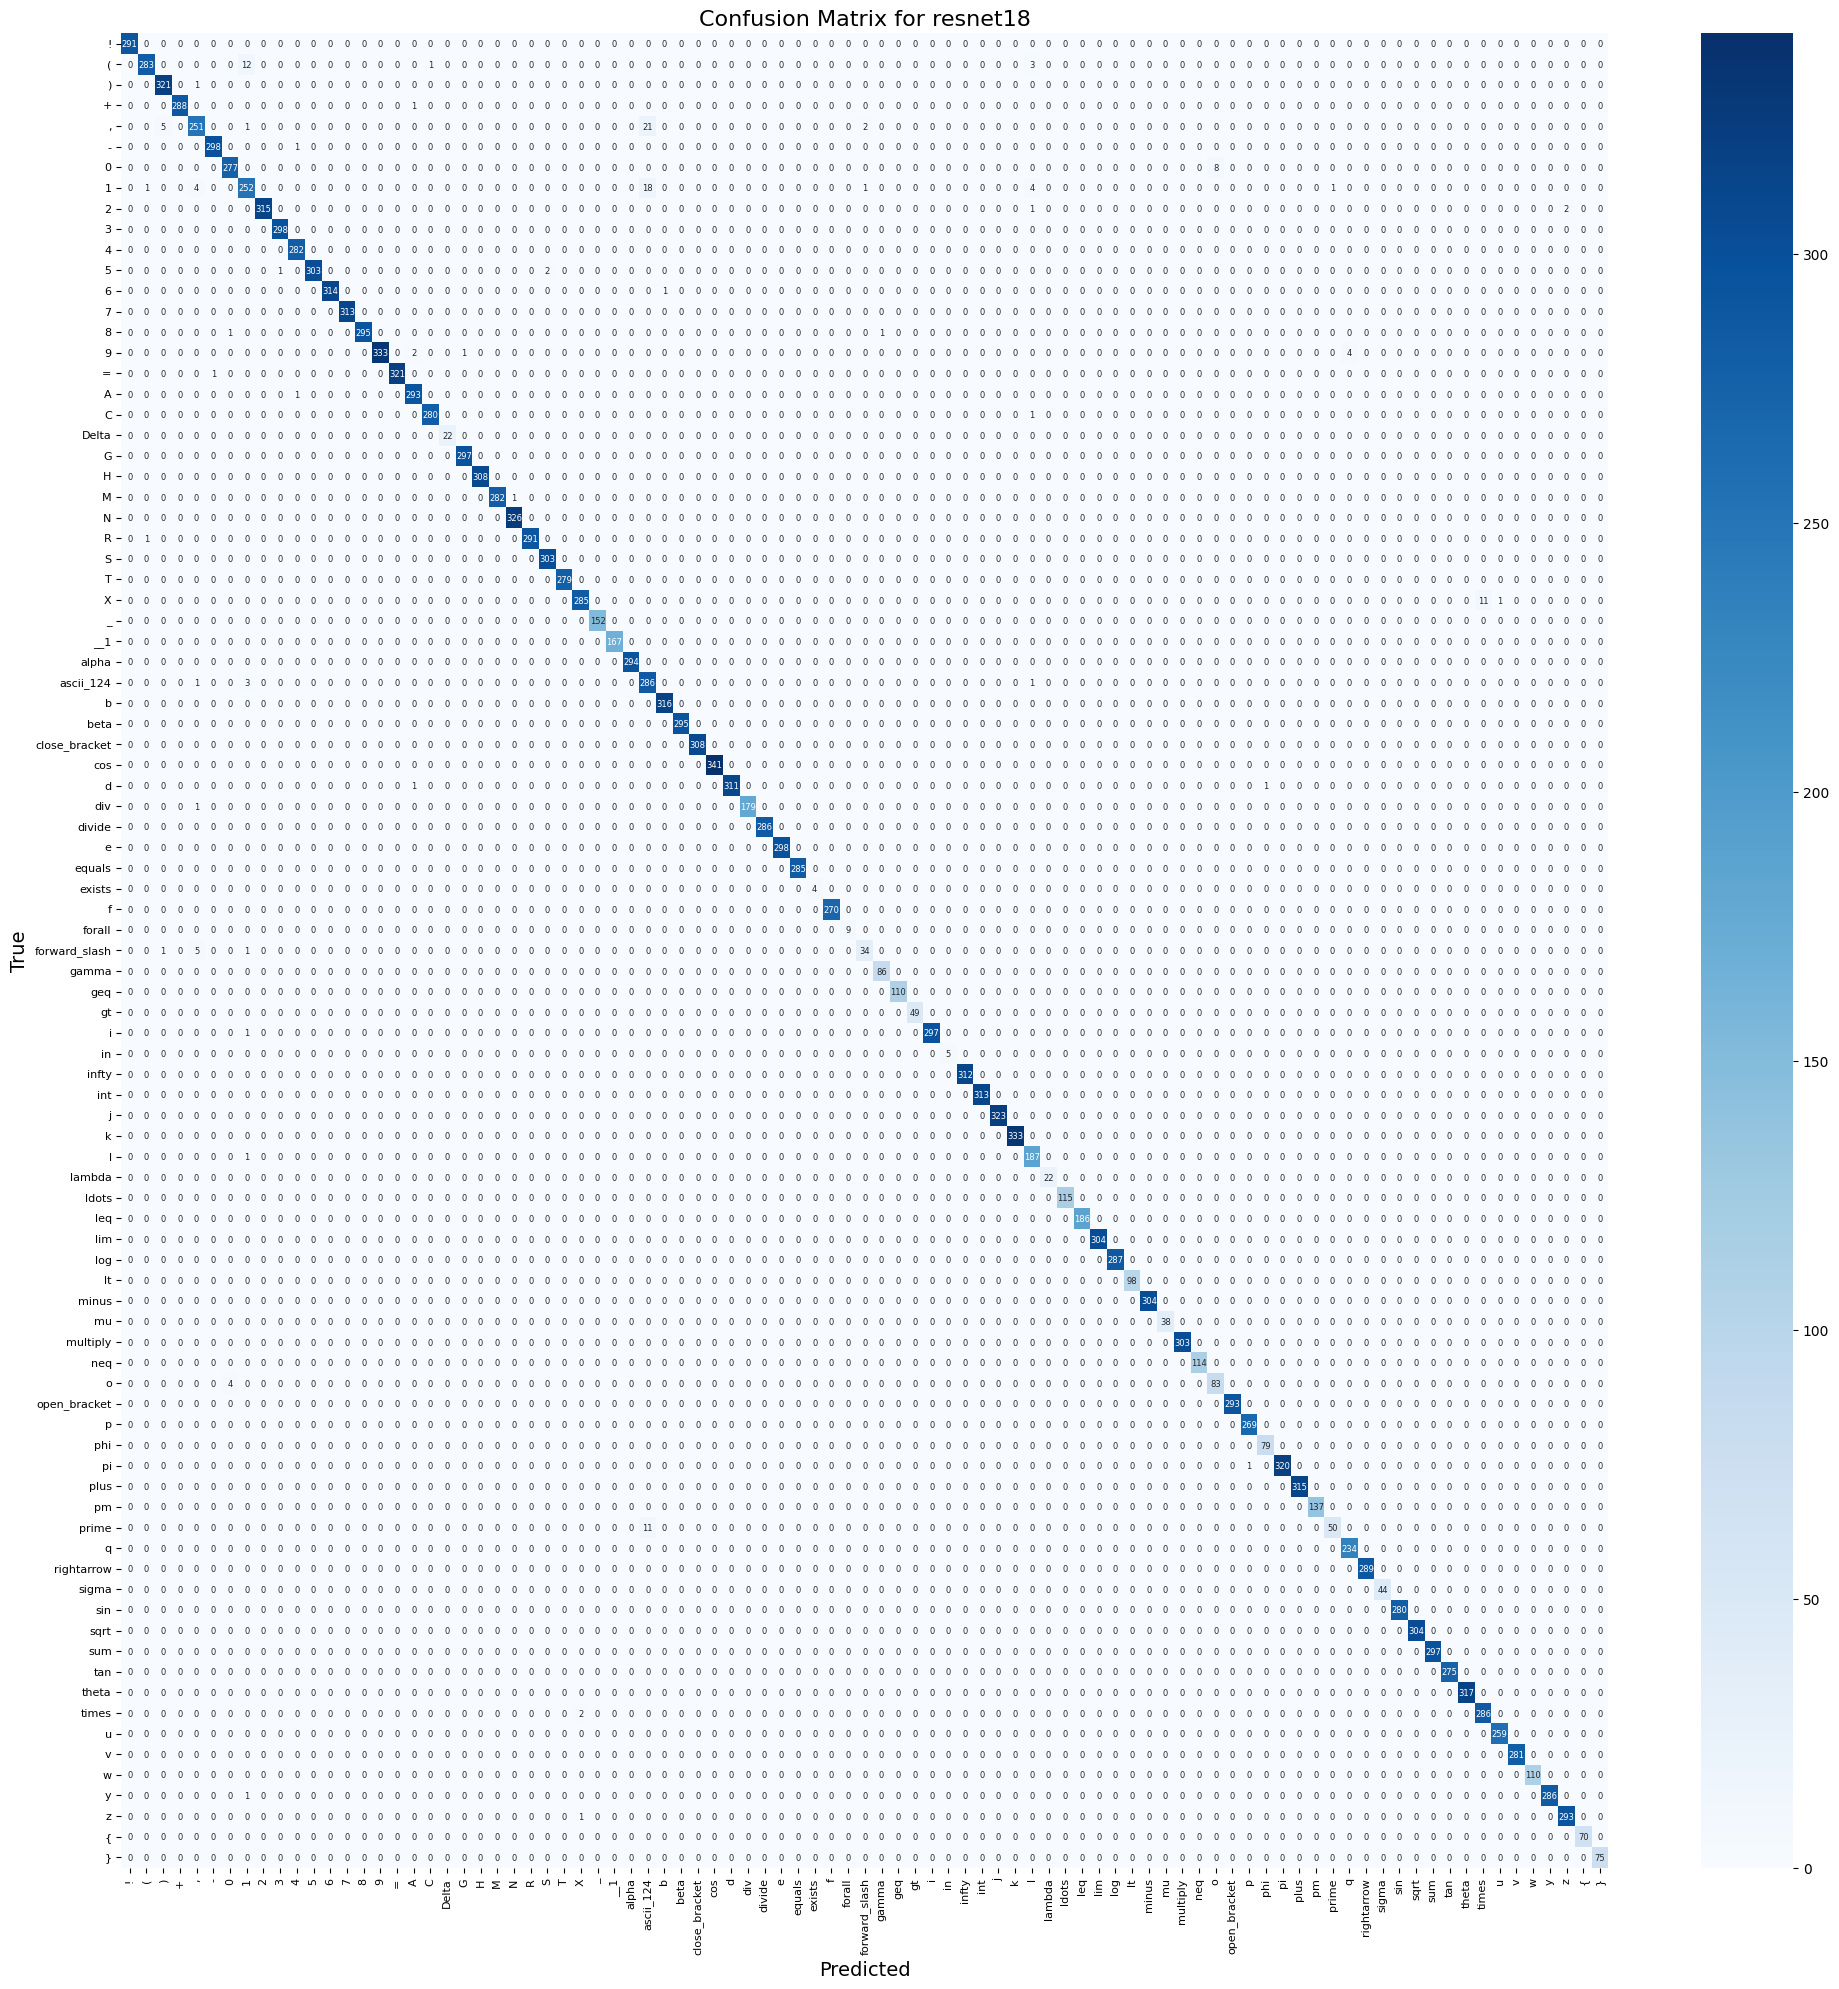

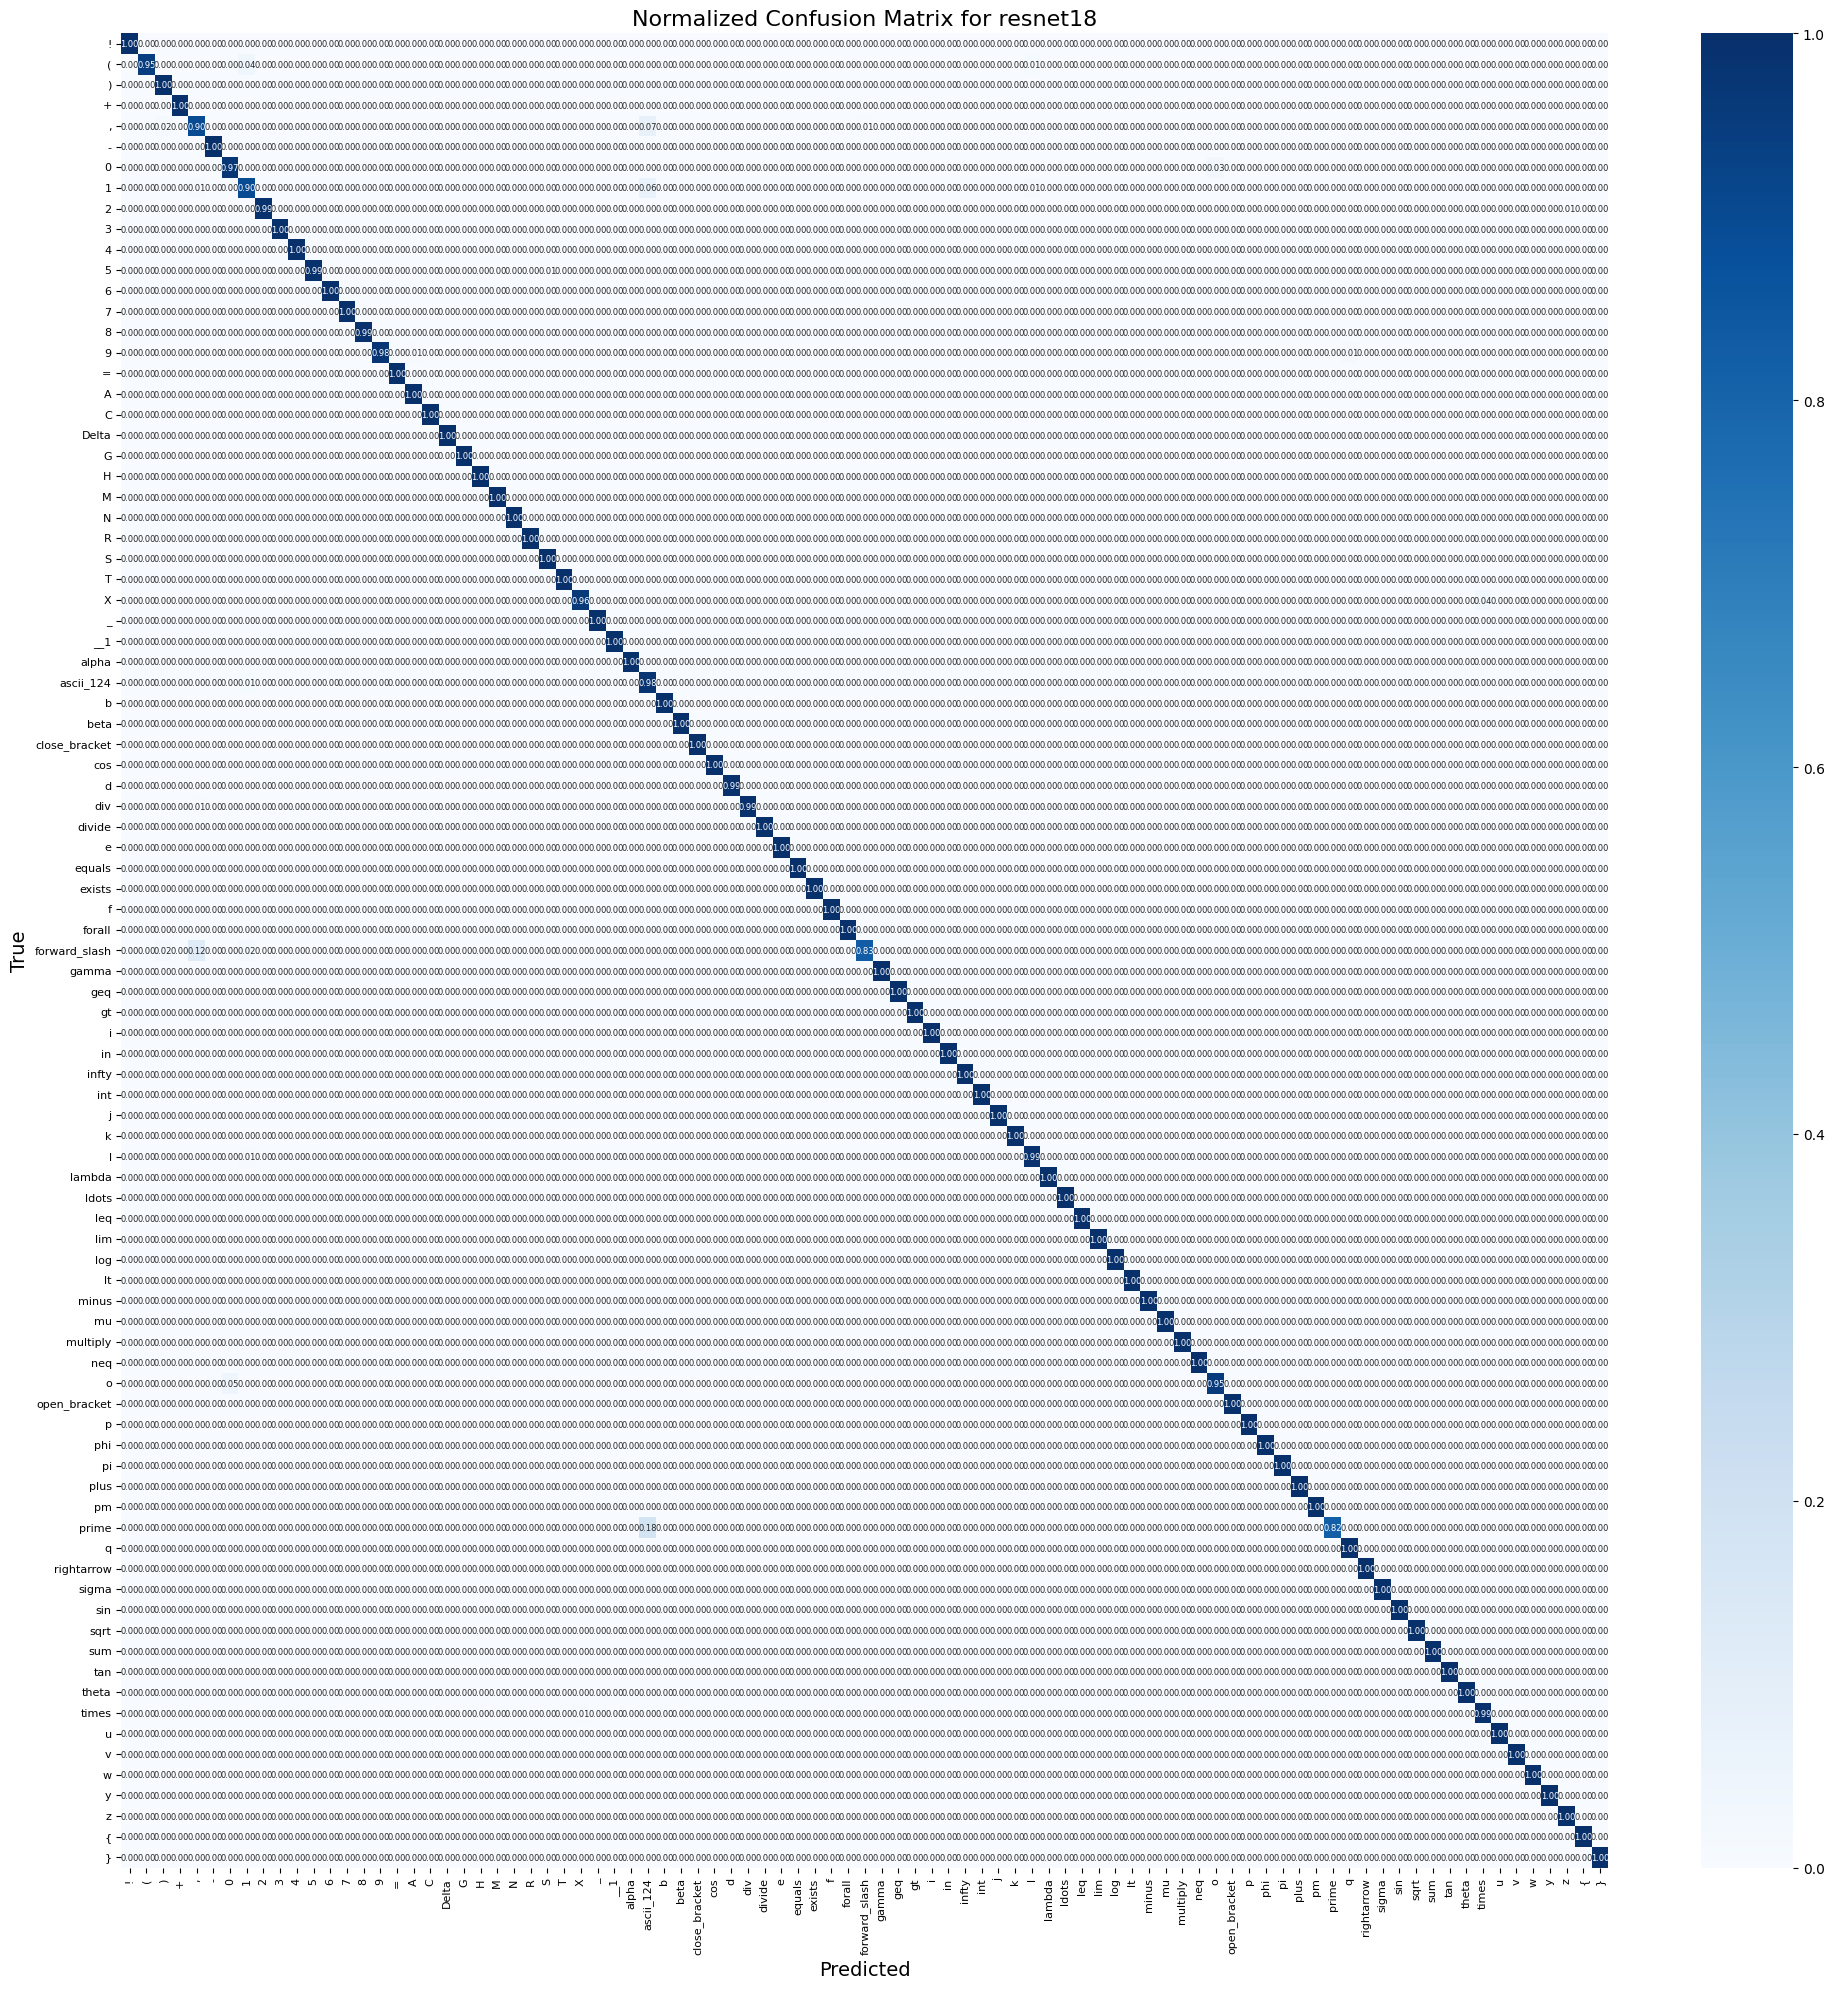


--- Classification Report ---
               precision    recall  f1-score   support

            !       1.00      1.00      1.00       291
            (       0.99      0.95      0.97       299
            )       0.98      1.00      0.99       322
            +       1.00      1.00      1.00       289
            ,       0.95      0.90      0.92       280
            -       1.00      1.00      1.00       299
            0       0.98      0.97      0.98       285
            1       0.93      0.90      0.91       281
            2       1.00      0.99      1.00       318
            3       1.00      1.00      1.00       298
            4       0.99      1.00      1.00       282
            5       1.00      0.99      1.00       306
            6       1.00      1.00      1.00       315
            7       1.00      1.00      1.00       313
            8       1.00      0.99      1.00       297
            9       1.00      0.98      0.99       340
            =       1.00      1.0

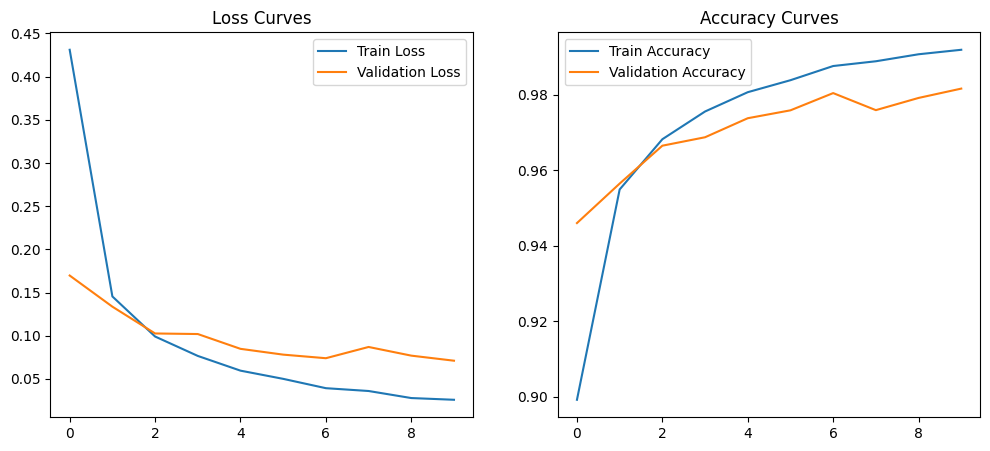

✅ Evaluation complete!


In [6]:
# 05_evaluate.py
import torch
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np
from torchvision import datasets, transforms
from tqdm import tqdm

from models import get_model  # from 03_models.py

# ------------------------
# Config (match training)
# ------------------------
DATA_DIR = "og_dataset"   # must match training script
MODEL_NAME = "resnet18"   # must match training
BATCH_SIZE = 32
VAL_SPLIT = 0.2
MODEL_PATH = f"{MODEL_NAME}_best.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# Transforms (same as training)
# ------------------------
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset + Debug Checks
# ------------------------
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=val_transforms)

print(f"✅ Classes detected: {full_dataset.classes}")
print(f"✅ Class-to-idx mapping: {full_dataset.class_to_idx}")

targets = [s[1] for s in full_dataset.samples]
print(f"✅ Total samples: {len(full_dataset.samples)}")
print(f"✅ Label range: {min(targets)} → {max(targets)}")

NUM_CLASSES = len(full_dataset.classes)
print(f"✅ NUM_CLASSES = {NUM_CLASSES}")

assert max(targets) < NUM_CLASSES, (
    f"ERROR: Found a label {max(targets)} >= NUM_CLASSES {NUM_CLASSES}. "
    "Likely an empty or corrupted folder exists in dataset!"
)

# ------------------------
# Train/Val split (same seed for reproducibility)
# ------------------------
val_size = int(len(full_dataset) * VAL_SPLIT)
train_size = len(full_dataset) - val_size
_, val_dataset = random_split(full_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
class_names = full_dataset.classes

# ------------------------
# Load Model
# ------------------------
model = get_model(MODEL_NAME, NUM_CLASSES).to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

# ------------------------
# Evaluation
# ------------------------
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in tqdm(val_loader, desc="Evaluating"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ------------------------
# Confusion Matrix (Improved)
# ------------------------
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(20, 20))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=class_names,
    yticklabels=class_names,
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 6}
)

plt.title(f'Confusion Matrix for {MODEL_NAME}', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(f'{MODEL_NAME}_confusion_matrix.png', dpi=300, bbox_inches="tight")
plt.show()

# ------------------------
# Normalized Confusion Matrix (optional, percentages)
# ------------------------
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20))
sns.heatmap(
    cm_normalized, annot=True, fmt='.2f',
    xticklabels=class_names,
    yticklabels=class_names,
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 6}
)

plt.title(f'Normalized Confusion Matrix for {MODEL_NAME}', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(f'{MODEL_NAME}_confusion_matrix_normalized.png', dpi=300, bbox_inches="tight")
plt.show()

# ------------------------
# Classification Report
# ------------------------
report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
print("\n--- Classification Report ---")
print(classification_report(all_labels, all_preds, target_names=class_names))

with open(f'{MODEL_NAME}_report.json', 'w') as f:
    json.dump(report, f)

# ------------------------
# Training Curves
# ------------------------
with open(f'{MODEL_NAME}_history.json', 'r') as f:
    history = json.load(f)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.savefig(f'{MODEL_NAME}_training_curves.png', dpi=300, bbox_inches="tight")
plt.show()

print("✅ Evaluation complete!")


In [7]:
# 04_train.py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import json
from tqdm import tqdm
from pathlib import Path

from models import get_model  # your 03_models.py

# ------------------------
# Config
# ------------------------
DATA_DIR = "og_dataset"
MODEL_NAME = "efficientnet_b0"   # "" or "vit_b_16"
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
NUM_EPOCHS = 10   # increased to 10
VAL_SPLIT = 0.2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# Transforms
# ------------------------
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset + Debug Checks
# ------------------------
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=train_transforms)

print(f"✅ Classes detected: {full_dataset.classes}")
print(f"✅ Class-to-idx mapping: {full_dataset.class_to_idx}")

targets = [s[1] for s in full_dataset.samples]  # all labels
print(f"✅ Total samples: {len(full_dataset.samples)}")
print(f"✅ Label range: {min(targets)} → {max(targets)}")

NUM_CLASSES = len(full_dataset.classes)
print(f"✅ NUM_CLASSES = {NUM_CLASSES}")

# 🔒 Debug assertion
assert max(targets) < NUM_CLASSES, (
    f"ERROR: Found a label {max(targets)} >= NUM_CLASSES {NUM_CLASSES}. "
    "Likely an empty or corrupted folder exists in dataset!"
)

# ------------------------
# Train/Val Split
# ------------------------
val_size = int(len(full_dataset) * VAL_SPLIT)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Update transforms for validation set
val_dataset.dataset.transform = val_transforms

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ------------------------
# Model, Loss, Optimizer
# ------------------------
model = get_model(MODEL_NAME, NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ------------------------
# Training Function
# ------------------------
def train_model(model_name, num_epochs=NUM_EPOCHS):
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    best_val_acc = 0.0
    best_val_loss = float("inf")
    best_epoch_acc = 0
    best_epoch_loss = 0

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        # Training phase
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        history["train_loss"].append(epoch_loss)
        history["train_acc"].append(epoch_acc.item())

        # Validation phase
        model.eval()
        val_loss, val_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= val_size
        val_acc = val_corrects.double() / val_size
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc.item())

        print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
        print(f"Val   Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # ------------------------
        # Save only the best model during 10 epochs
        # ------------------------
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch_acc = epoch + 1
            torch.save(model.state_dict(), f"{model_name}_best.pth")  # single best model

    # Save history with best epoch info
    history["best_epoch"] = best_epoch_acc
    history["best_val_acc"] = best_val_acc.item()

    with open(f"{model_name}_history.json", "w") as f:
        json.dump(history, f)

    print(f"✅ Training complete! Best Val Acc = {best_val_acc:.4f} at epoch {best_epoch_acc}")

# ------------------------
# Run Training
# ------------------------
if __name__ == "__main__":
    train_model(MODEL_NAME, NUM_EPOCHS)


Using device: cuda
✅ Classes detected: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
✅ Class-to-idx mapping: {'!': 0, '(': 1, ')': 2, '+': 3, ',': 4, '-': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, '=': 16, 'A': 17, 'C': 18, 'Delta': 19, 'G': 20, 'H': 21, 'M': 22, 'N': 23, 'R': 24, 'S': 25, 'T': 26, 'X': 27, '_': 28, '__1': 29, 'alpha': 30, 'ascii_124': 31, 'b': 32, 'beta': 33, 'close_b

Validation: 100%|██████████| 657/657 [02:46<00:00,  3.95it/s]


Train Loss: 0.7117 Acc: 0.8266
Val   Loss: 0.1808 Acc: 0.9435

Epoch 2/10
--------------------


Validation: 100%|██████████| 657/657 [01:08<00:00,  9.65it/s]


Train Loss: 0.1953 Acc: 0.9398
Val   Loss: 0.1425 Acc: 0.9519

Epoch 3/10
--------------------


Validation: 100%|██████████| 657/657 [00:48<00:00, 13.68it/s]


Train Loss: 0.1441 Acc: 0.9528
Val   Loss: 0.1202 Acc: 0.9590

Epoch 4/10
--------------------


Validation: 100%|██████████| 657/657 [01:07<00:00,  9.76it/s]


Train Loss: 0.1155 Acc: 0.9614
Val   Loss: 0.1005 Acc: 0.9680

Epoch 5/10
--------------------


Validation: 100%|██████████| 657/657 [03:17<00:00,  3.33it/s]


Train Loss: 0.0934 Acc: 0.9683
Val   Loss: 0.0894 Acc: 0.9721

Epoch 6/10
--------------------


Validation: 100%|██████████| 657/657 [01:08<00:00,  9.52it/s]


Train Loss: 0.0779 Acc: 0.9736
Val   Loss: 0.0813 Acc: 0.9740

Epoch 7/10
--------------------


Validation: 100%|██████████| 657/657 [00:46<00:00, 14.25it/s]


Train Loss: 0.0666 Acc: 0.9774
Val   Loss: 0.0781 Acc: 0.9746

Epoch 8/10
--------------------


Validation: 100%|██████████| 657/657 [01:04<00:00, 10.15it/s]


Train Loss: 0.0574 Acc: 0.9809
Val   Loss: 0.0731 Acc: 0.9775

Epoch 9/10
--------------------


Validation: 100%|██████████| 657/657 [01:13<00:00,  8.91it/s]


Train Loss: 0.0507 Acc: 0.9830
Val   Loss: 0.0701 Acc: 0.9794

Epoch 10/10
--------------------


Validation: 100%|██████████| 657/657 [00:56<00:00, 11.54it/s]

Train Loss: 0.0442 Acc: 0.9853
Val   Loss: 0.0759 Acc: 0.9793
✅ Training complete! Best Val Acc = 0.9794 at epoch 9


Using device: cuda
✅ Classes detected: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
✅ Class-to-idx mapping: {'!': 0, '(': 1, ')': 2, '+': 3, ',': 4, '-': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, '=': 16, 'A': 17, 'C': 18, 'Delta': 19, 'G': 20, 'H': 21, 'M': 22, 'N': 23, 'R': 24, 'S': 25, 'T': 26, 'X': 27, '_': 28, '__1': 29, 'alpha': 30, 'ascii_124': 31, 'b': 32, 'beta': 33, 'close_b

Evaluating: 100%|██████████| 657/657 [01:19<00:00,  8.22it/s]


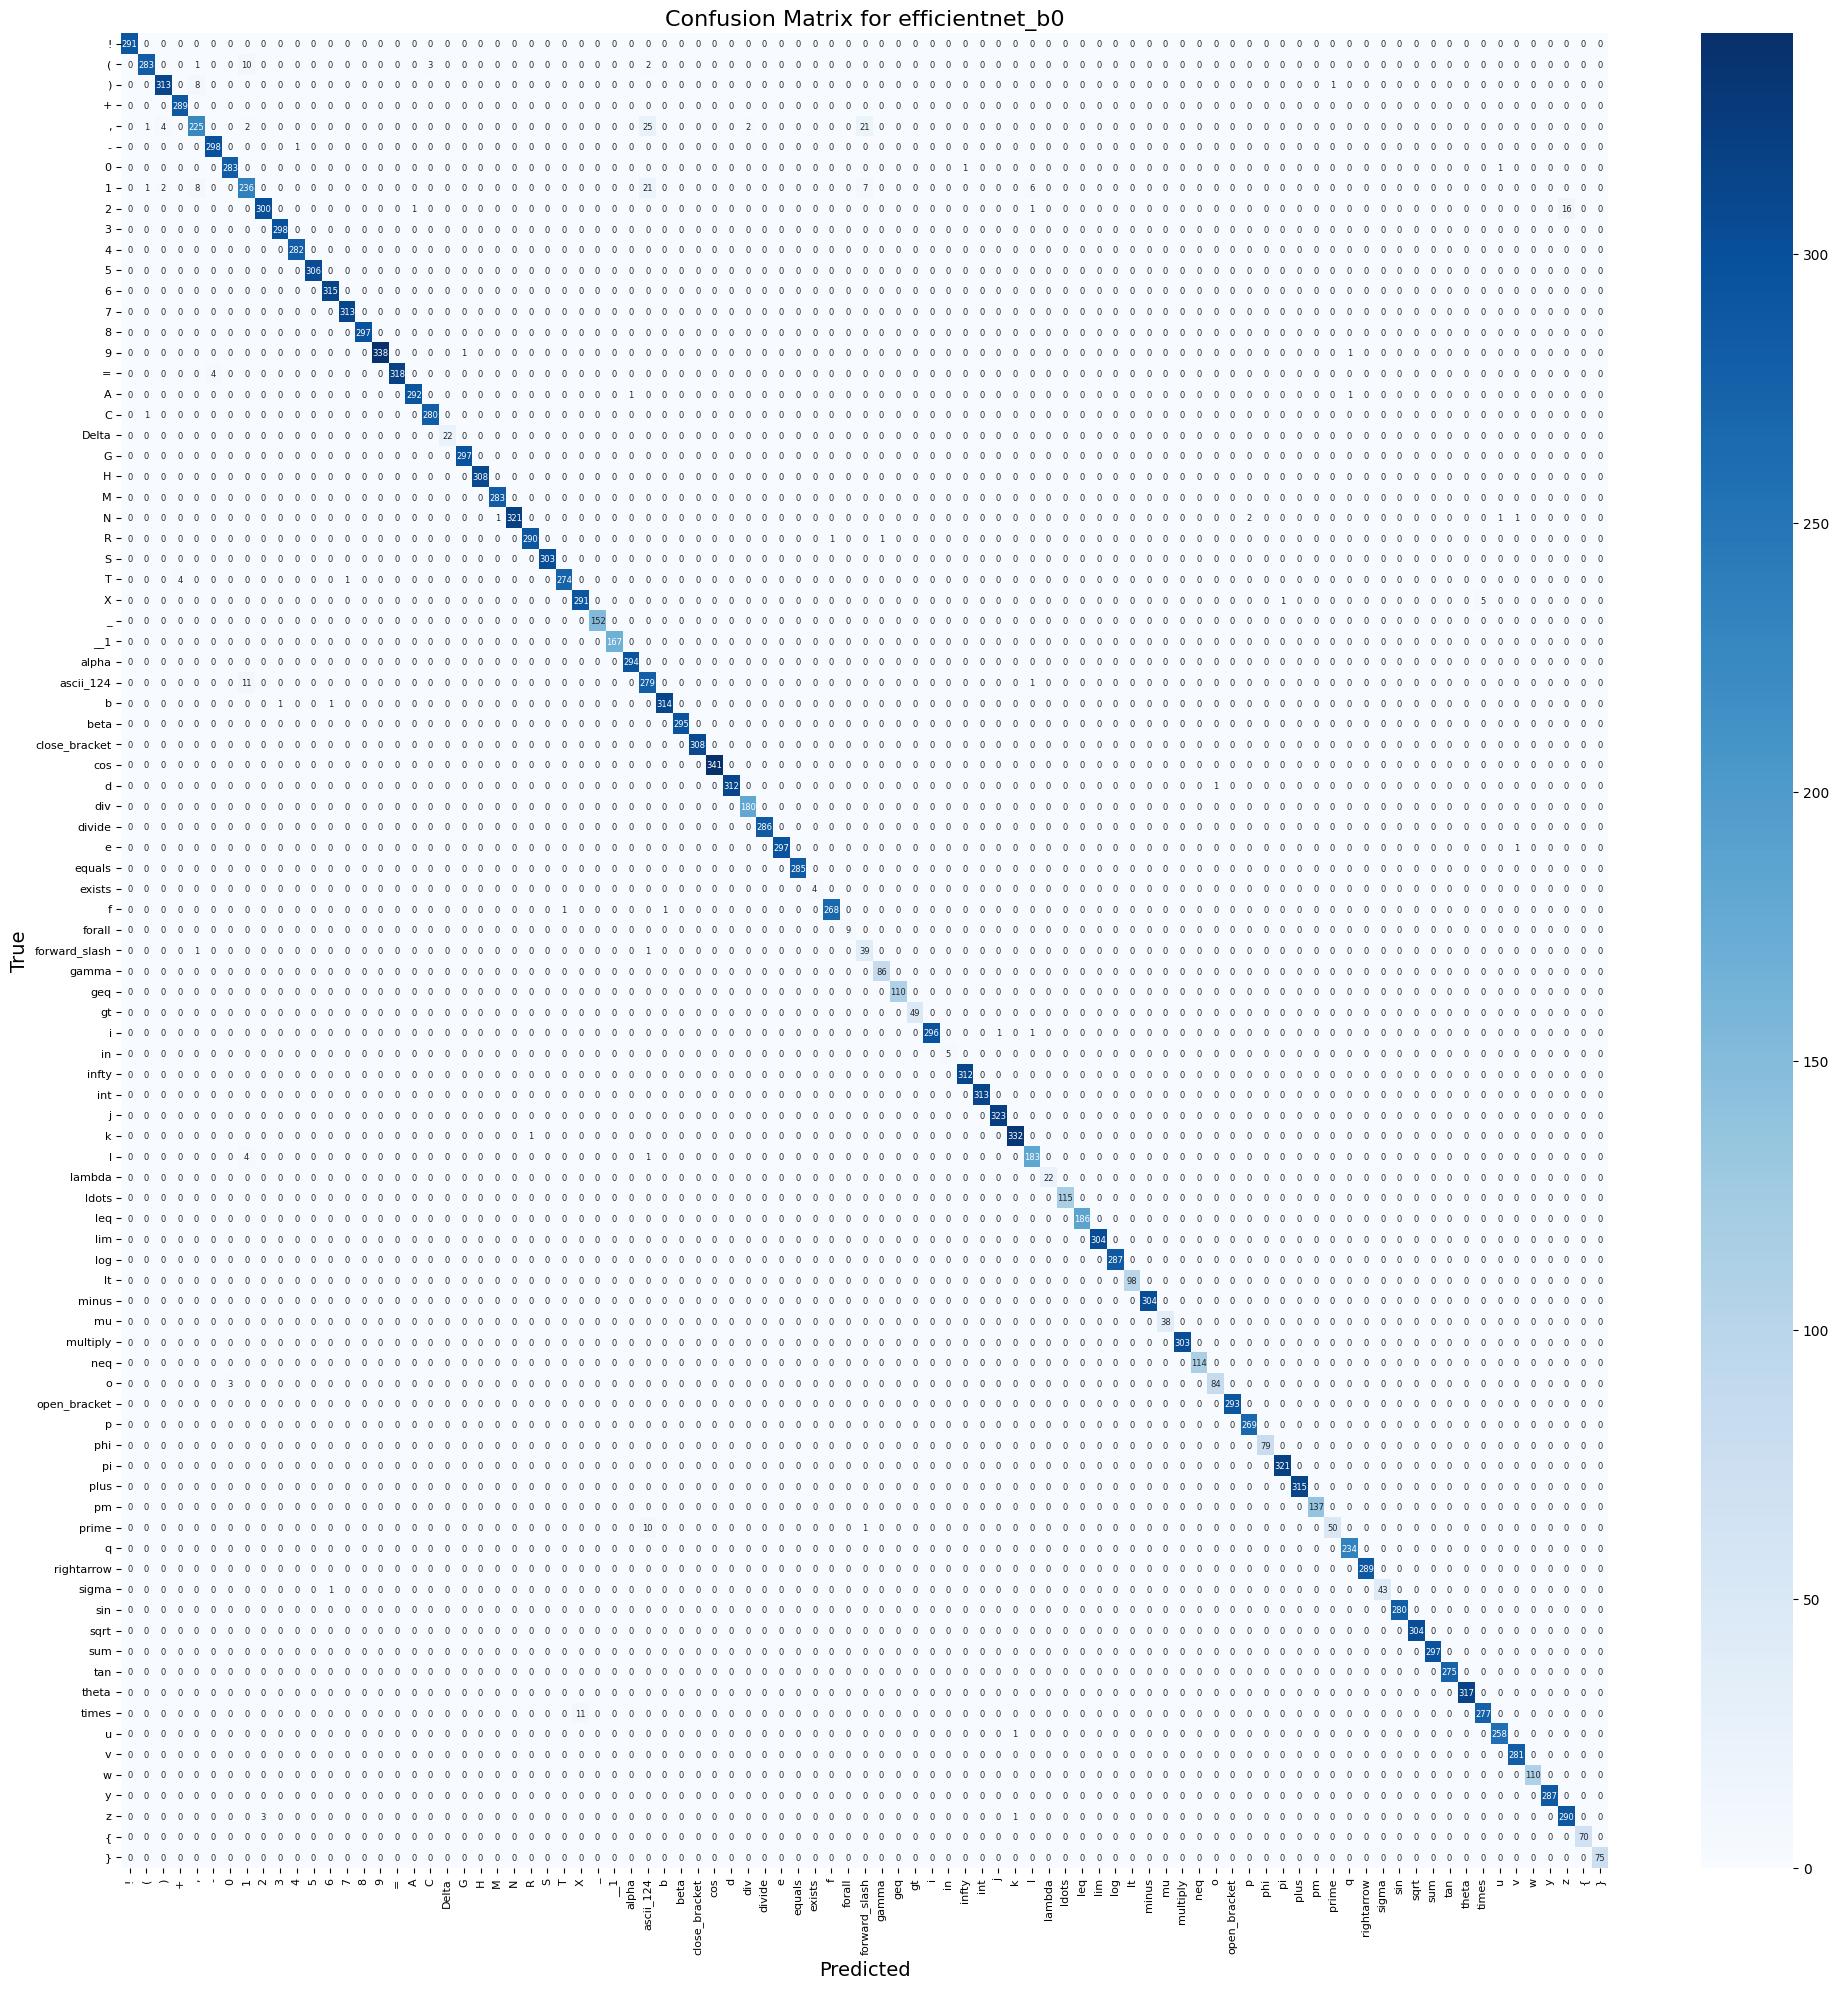

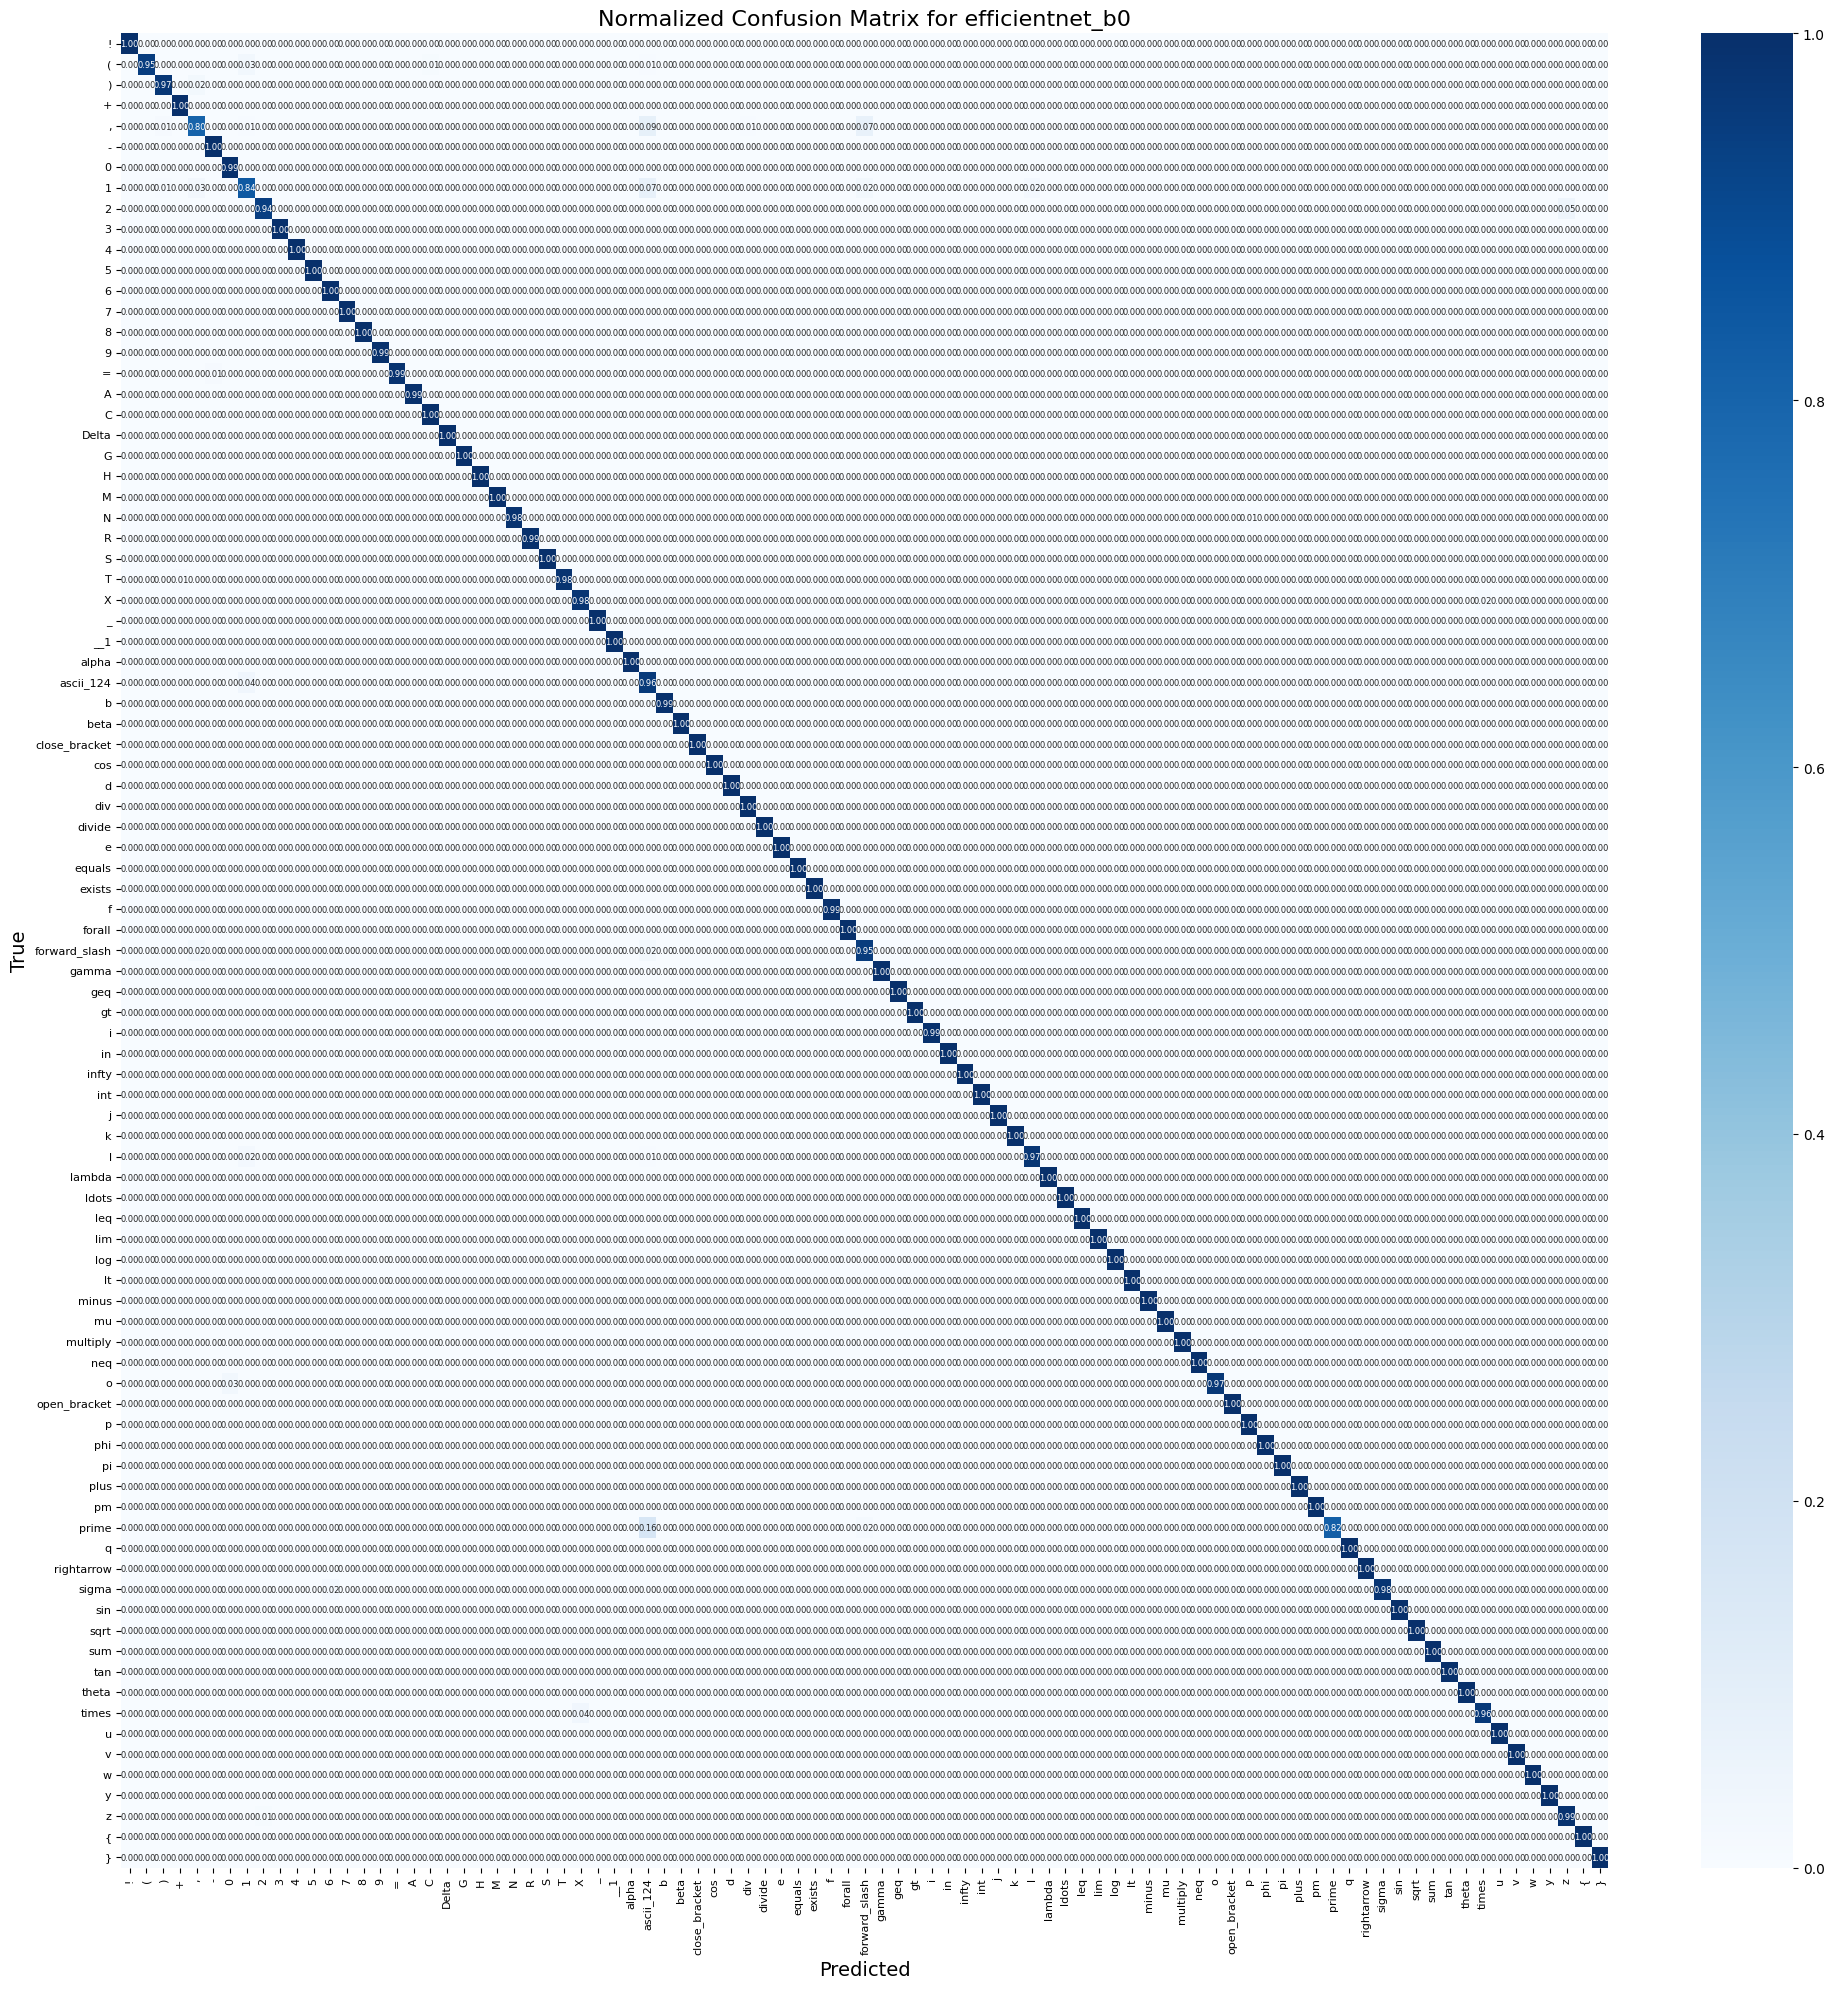


--- Classification Report ---
               precision    recall  f1-score   support

            !       1.00      1.00      1.00       291
            (       0.99      0.95      0.97       299
            )       0.98      0.97      0.98       322
            +       0.99      1.00      0.99       289
            ,       0.93      0.80      0.86       280
            -       0.99      1.00      0.99       299
            0       0.99      0.99      0.99       285
            1       0.90      0.84      0.87       281
            2       0.99      0.94      0.97       318
            3       1.00      1.00      1.00       298
            4       1.00      1.00      1.00       282
            5       1.00      1.00      1.00       306
            6       0.99      1.00      1.00       315
            7       1.00      1.00      1.00       313
            8       1.00      1.00      1.00       297
            9       1.00      0.99      1.00       340
            =       1.00      0.9

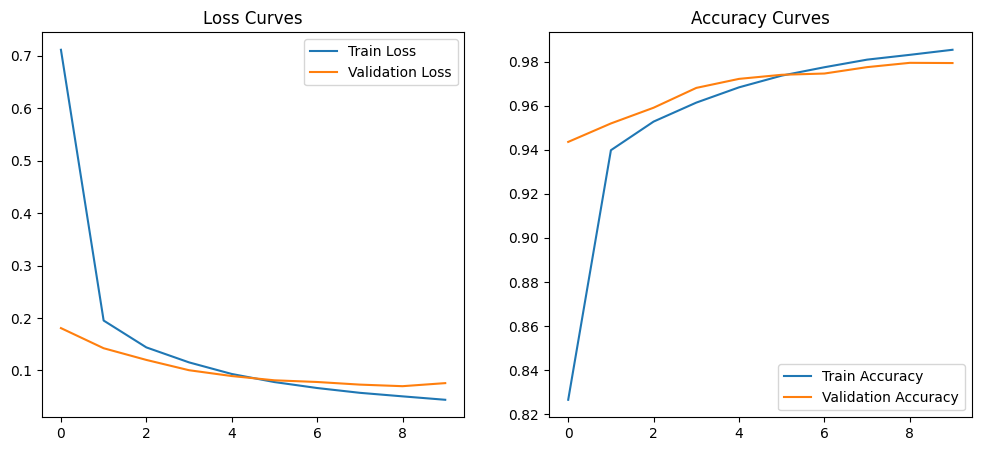

✅ Evaluation complete!


In [8]:
# 05_evaluate.py
import torch
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import numpy as np
from torchvision import datasets, transforms
from tqdm import tqdm

from models import get_model  # from 03_models.py

# ------------------------
# Config (match training)
# ------------------------
DATA_DIR = "og_dataset"   # must match training script
MODEL_NAME = "efficientnet_b0"   # updated model
BATCH_SIZE = 32
VAL_SPLIT = 0.2
MODEL_PATH = f"{MODEL_NAME}_best.pth"  # must match training save

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# Transforms (same as training)
# ------------------------
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # EfficientNet input size is 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset + Debug Checks
# ------------------------
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=val_transforms)

print(f"✅ Classes detected: {full_dataset.classes}")
print(f"✅ Class-to-idx mapping: {full_dataset.class_to_idx}")

targets = [s[1] for s in full_dataset.samples]
print(f"✅ Total samples: {len(full_dataset.samples)}")
print(f"✅ Label range: {min(targets)} → {max(targets)}")

NUM_CLASSES = len(full_dataset.classes)
print(f"✅ NUM_CLASSES = {NUM_CLASSES}")

assert max(targets) < NUM_CLASSES, (
    f"ERROR: Found a label {max(targets)} >= NUM_CLASSES {NUM_CLASSES}. "
    "Likely an empty or corrupted folder exists in dataset!"
)

# ------------------------
# Train/Val split (same seed for reproducibility)
# ------------------------
val_size = int(len(full_dataset) * VAL_SPLIT)
train_size = len(full_dataset) - val_size
_, val_dataset = random_split(full_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
class_names = full_dataset.classes

# ------------------------
# Load Model
# ------------------------
model = get_model(MODEL_NAME, NUM_CLASSES).to(device)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.eval()

# ------------------------
# Evaluation
# ------------------------
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in tqdm(val_loader, desc="Evaluating"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ------------------------
# Confusion Matrix (Improved)
# ------------------------
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(20, 20))
sns.heatmap(
    cm, annot=True, fmt='d',
    xticklabels=class_names,
    yticklabels=class_names,
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 6}
)

plt.title(f'Confusion Matrix for {MODEL_NAME}', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(f'{MODEL_NAME}_confusion_matrix.png', dpi=300, bbox_inches="tight")
plt.show()

# ------------------------
# Normalized Confusion Matrix (optional, percentages)
# ------------------------
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20))
sns.heatmap(
    cm_normalized, annot=True, fmt='.2f',
    xticklabels=class_names,
    yticklabels=class_names,
    cmap='Blues',
    cbar=True,
    annot_kws={"size": 6}
)

plt.title(f'Normalized Confusion Matrix for {MODEL_NAME}', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.savefig(f'{MODEL_NAME}_confusion_matrix_normalized.png', dpi=300, bbox_inches="tight")
plt.show()

# ------------------------
# Classification Report
# ------------------------
report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
print("\n--- Classification Report ---")
print(classification_report(all_labels, all_preds, target_names=class_names))

with open(f'{MODEL_NAME}_report.json', 'w') as f:
    json.dump(report, f)

# ------------------------
# Training Curves
# ------------------------
with open(f'{MODEL_NAME}_history.json', 'r') as f:
    history = json.load(f)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.legend()

plt.savefig(f'{MODEL_NAME}_training_curves.png', dpi=300, bbox_inches="tight")
plt.show()

print("✅ Evaluation complete!")


In [ ]:
# 04_train.py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import json
from tqdm import tqdm
from pathlib import Path

from models import get_model  # your 03_models.py

# ------------------------
# Config
# ------------------------
DATA_DIR = "og_dataset"
MODEL_NAME = "vit_b_16"   # "efficientnet_b0" or "vit_b_16"
BATCH_SIZE = 32
LEARNING_RATE = 1e-4
NUM_EPOCHS = 10   # increased to 10
VAL_SPLIT = 0.2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# Transforms
# ------------------------
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset + Debug Checks
# ------------------------
full_dataset = datasets.ImageFolder(root=DATA_DIR, transform=train_transforms)

print(f"✅ Classes detected: {full_dataset.classes}")
print(f"✅ Class-to-idx mapping: {full_dataset.class_to_idx}")

targets = [s[1] for s in full_dataset.samples]  # all labels
print(f"✅ Total samples: {len(full_dataset.samples)}")
print(f"✅ Label range: {min(targets)} → {max(targets)}")

NUM_CLASSES = len(full_dataset.classes)
print(f"✅ NUM_CLASSES = {NUM_CLASSES}")

# 🔒 Debug assertion
assert max(targets) < NUM_CLASSES, (
    f"ERROR: Found a label {max(targets)} >= NUM_CLASSES {NUM_CLASSES}. "
    "Likely an empty or corrupted folder exists in dataset!"
)

# ------------------------
# Train/Val Split
# ------------------------
val_size = int(len(full_dataset) * VAL_SPLIT)
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Update transforms for validation set
val_dataset.dataset.transform = val_transforms

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ------------------------
# Model, Loss, Optimizer
# ------------------------
model = get_model(MODEL_NAME, NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# ------------------------
# Training Function
# ------------------------
def train_model(model_name, num_epochs=NUM_EPOCHS):
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    best_val_acc = 0.0
    best_val_loss = float("inf")
    best_epoch_acc = 0
    best_epoch_loss = 0

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 20)

        # Training phase
        model.train()
        running_loss, running_corrects = 0.0, 0

        for inputs, labels in tqdm(train_loader, desc="Training"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / train_size
        epoch_acc = running_corrects.double() / train_size
        history["train_loss"].append(epoch_loss)
        history["train_acc"].append(epoch_acc.item())

        # Validation phase
        model.eval()
        val_loss, val_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        val_loss /= val_size
        val_acc = val_corrects.double() / val_size
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc.item())

        print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
        print(f"Val   Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

        # ------------------------
        # Save only the best model during 10 epochs
        # ------------------------
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_epoch_acc = epoch + 1
            torch.save(model.state_dict(), f"{model_name}_best.pth")  # single best model

    # Save history with best epoch info
    history["best_epoch"] = best_epoch_acc
    history["best_val_acc"] = best_val_acc.item()

    with open(f"{model_name}_history.json", "w") as f:
        json.dump(history, f)

    print(f"✅ Training complete! Best Val Acc = {best_val_acc:.4f} at epoch {best_epoch_acc}")

# ------------------------
# Run Training
# ------------------------
if __name__ == "__main__":
    train_model(MODEL_NAME, NUM_EPOCHS)


Using device: cuda
✅ Classes detected: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
✅ Class-to-idx mapping: {'!': 0, '(': 1, ')': 2, '+': 3, ',': 4, '-': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, '=': 16, 'A': 17, 'C': 18, 'Delta': 19, 'G': 20, 'H': 21, 'M': 22, 'N': 23, 'R': 24, 'S': 25, 'T': 26, 'X': 27, '_': 28, '__1': 29, 'alpha': 30, 'ascii_124': 31, 'b': 32, 'beta': 33, 'close_b

Validation: 100%|██████████| 657/657 [06:38<00:00,  1.65it/s]


Train Loss: 0.4203 Acc: 0.8847
Val   Loss: 0.2101 Acc: 0.9290

Epoch 2/10
--------------------


Validation: 100%|██████████| 657/657 [03:10<00:00,  3.44it/s]


Train Loss: 0.2069 Acc: 0.9332
Val   Loss: 0.1812 Acc: 0.9407

Epoch 3/10
--------------------


Validation: 100%|██████████| 657/657 [02:51<00:00,  3.84it/s]


Train Loss: 0.1676 Acc: 0.9438
Val   Loss: 0.1567 Acc: 0.9463

Epoch 4/10
--------------------


Validation: 100%|██████████| 657/657 [02:44<00:00,  3.99it/s]


Train Loss: 0.1344 Acc: 0.9543
Val   Loss: 0.1608 Acc: 0.9437

Epoch 5/10
--------------------


Validation: 100%|██████████| 657/657 [03:02<00:00,  3.59it/s]


Train Loss: 0.1180 Acc: 0.9603
Val   Loss: 0.1177 Acc: 0.9614

Epoch 6/10
--------------------


Validation: 100%|██████████| 657/657 [03:00<00:00,  3.63it/s]


Train Loss: 0.1039 Acc: 0.9651
Val   Loss: 0.1066 Acc: 0.9642

Epoch 7/10
--------------------


Validation: 100%|██████████| 657/657 [02:40<00:00,  4.09it/s]


Train Loss: 0.0901 Acc: 0.9695
Val   Loss: 0.1082 Acc: 0.9641

Epoch 8/10
--------------------


Validation: 100%|██████████| 657/657 [02:41<00:00,  4.06it/s]


Train Loss: 0.0744 Acc: 0.9750
Val   Loss: 0.0960 Acc: 0.9682

Epoch 9/10
--------------------


Validation: 100%|██████████| 657/657 [02:51<00:00,  3.84it/s]


Train Loss: 0.0679 Acc: 0.9772
Val   Loss: 0.0866 Acc: 0.9712

Epoch 10/10
--------------------


Validation: 100%|██████████| 657/657 [02:50<00:00,  3.86it/s]


Train Loss: 0.0624 Acc: 0.9791
Val   Loss: 0.0852 Acc: 0.9737
✅ Training complete! Best Val Acc = 0.9737 at epoch 10


: 

In [ ]:
# 05_evaluate.py
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from pathlib import Path
import json
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

from models import get_model  # your 03_models.py

# ------------------------
# Config (same as training)
# ------------------------
DATA_DIR = "og_dataset"
MODEL_NAME = "vit_b_16"   # same model you trained
BATCH_SIZE = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ------------------------
# Transforms (validation/test only)
# ------------------------
eval_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ------------------------
# Dataset & Loader
# ------------------------
dataset = datasets.ImageFolder(root=DATA_DIR, transform=eval_transforms)
NUM_CLASSES = len(dataset.classes)
print(f"✅ Classes: {dataset.classes}")

loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ------------------------
# Load Model
# ------------------------
model = get_model(MODEL_NAME, NUM_CLASSES).to(device)
model.load_state_dict(torch.load(f"{MODEL_NAME}_best.pth", map_location=device))
model.eval()

criterion = nn.CrossEntropyLoss()

# ------------------------
# Evaluation
# ------------------------
all_preds, all_labels = [], []
total_loss, total_correct = 0.0, 0

with torch.no_grad():
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)
        total_loss += loss.item() * inputs.size(0)
        total_correct += torch.sum(preds == labels.data)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

avg_loss = total_loss / len(dataset)
avg_acc = total_correct.double().item() / len(dataset)

print(f"\n📊 Evaluation Results")
print(f"Loss: {avg_loss:.4f}")
print(f"Accuracy: {avg_acc:.4f}")

# ------------------------
# Classification Report & Confusion Matrix
# ------------------------
report = classification_report(all_labels, all_preds, target_names=dataset.classes, digits=4)
cm = confusion_matrix(all_labels, all_preds)

print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Save metrics
results = {
    "loss": avg_loss,
    "accuracy": avg_acc,
    "classification_report": report,
    "confusion_matrix": cm.tolist()
}

with open(f"{MODEL_NAME}_eval.json", "w") as f:
    json.dump(results, f, indent=4)

print(f"✅ Saved evaluation results to {MODEL_NAME}_eval.json")


Using device: cuda
✅ Classes: ['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '_', '__1', 'alpha', 'ascii_124', 'b', 'beta', 'close_bracket', 'cos', 'd', 'div', 'divide', 'e', 'equals', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'minus', 'mu', 'multiply', 'neq', 'o', 'open_bracket', 'p', 'phi', 'pi', 'plus', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']

📊 Evaluation Results
Loss: 0.0527
Accuracy: 0.9826

Classification Report:
                precision    recall  f1-score   support

            !     0.9985    1.0000    0.9992      1300
            (     0.9852    0.9320    0.9579      1500
            )     0.9863    0.9133    0.9484      1500
            +     0.9880    0.9913    0.9897      1500
      

: 